In [79]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import random as rm
import sys
from sklearn import preprocessing
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Get the data from csv file

In [8]:
def getData(fname, dimension):
    # create a new array to store the data
    data = []
    label = []
    with open(fname, mode ='r')as file:
        # reading the CSV file
        csvFile = csv.reader(file)
        
        # displaying the contents of the CSV file
        for lines in csvFile: 
            data.append(lines[1:])
            label.append(lines[0])
    data = np.array(data, dtype=float)
    label[0] = '1'
    label = np.array(label, dtype=float)
    return (data, label)

In [9]:
xdata, ydata = getData("wine_data.csv",13)
# print(xdata)

In [10]:
print(len(xdata))
print(len(ydata))

177
177


# (a)Baseline for comparison
## Standardize the dataset

In [84]:
xdata_scalar = preprocessing.StandardScaler().fit(xdata)
xdata_standard = xdata_scalar.transform(xdata)

### Plot different features

In [12]:
def plot_features(xdata, ydata, feature1, feature2):
    
    plt.title(f"Data in feature space {feature1 + 1} and {feature2 + 1}")
    plt.plot(xdata[ydata == 1, feature1],xdata[ydata == 1, feature2], 'rx', label = "Class 1")
    plt.plot(xdata[ydata == 2, feature1],xdata[ydata == 2, feature2], 'go', label = "Class 2")
    plt.plot(xdata[ydata == 3, feature1],xdata[ydata == 3, feature2], 'bs', label = "Class 3")
    plt.xlabel(f"Feature {feature1 + 1}")
    plt.ylabel(f"Feature {feature2 + 1}")
    plt.legend()
    plt.show()

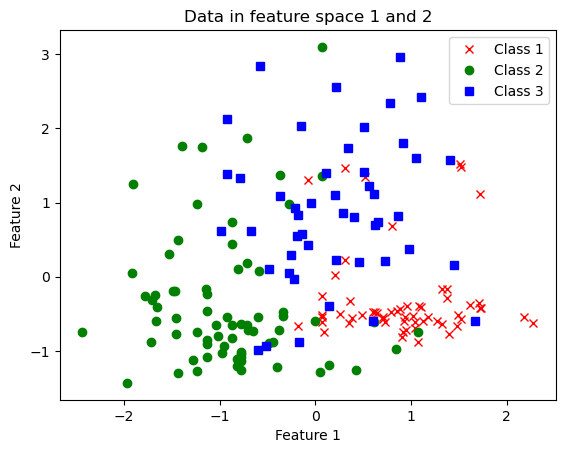

In [13]:
# plot the data projected into x1, x2 space
plot_features(xdata_standard, ydata, 0, 1)

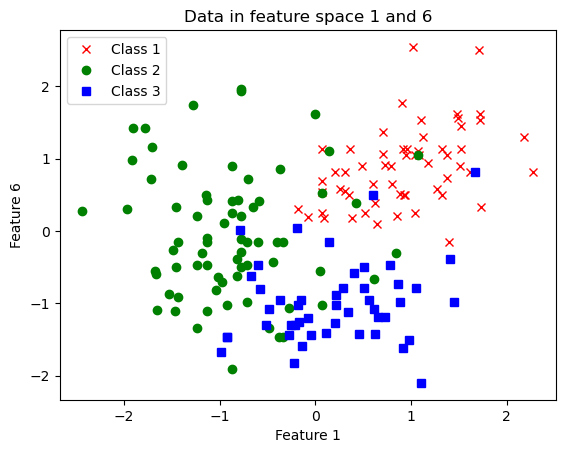

In [8]:
# plot the data projected into x1, x6 space
plot_features(xdata_standard, ydata, 0, 5)

## Run a multiclass perceptron classifier on the 2D data

In [14]:
def shuffle(data, label):
    newData = np.copy(data)
    newLabel = np.copy(label)
    N = len(newData)
    shuff = np.random.permutation(N)
    for i in range(N):
        newData[i] = data[shuff[i]]
        newLabel[i] = label[shuff[i]]
#     print(newData)
    return (newData, newLabel)

In [15]:
def MLP_classifier(xdata_orig, ydata_orig):
    xdata = np.copy(xdata_orig)
    ydata = np.copy(ydata_orig)
    
    # Run 5 times
    weight_first_fold = []
    mean_error_rate = []
    for r in range(5):
        xdata, ydata = shuffle(xdata, ydata)
        
        # Define the cross-validation object
        error_rate_history = []
        cv = KFold(n_splits=20)
        for i, (train_index, val_index) in enumerate(cv.split(xdata)): # i in range of 20
            train_xdata = xdata[train_index]
            train_ydata = ydata[train_index]
            val_xdata = xdata[val_index]
            val_ydata = ydata[val_index]
            
            mlp = Perceptron(fit_intercept = False)
            mlp.fit(train_xdata, train_ydata)
            error_rate_history.append(1 - mlp.score(val_xdata, val_ydata))
            if( i == 0 ):
                weight_first_fold.append(mlp.coef_)
        print(f"The mean classification error rate in run {r + 1} = {np.mean(error_rate_history)}")
        mean_error_rate.append(np.mean(error_rate_history))
    print(f"The average and standard deviation of the mean classification error over the 5 runs is {np.mean(mean_error_rate)} and {np.std(mean_error_rate)}")
    return weight_first_fold

In [61]:
################################################
## EE559 HW1, Prof. Jenkins
## Created by Arindam Jati
## Modified by Lei Lei
################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


def plotDecBoundaries(training, label_train, w, title, inc = 0.01):

    # Plot the decision boundaries and data points for perceptron learning classification result
    # training: traning data
    # label_train: class lables correspond to training data
    # w: weight vector
    # title: the title of the plot
    # inc: step size
    nclass = max(np.unique(label_train))
    
    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1
    
    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
#     inc = 0.5
    inc = inc

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
#     (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1] + inc / 100, inc),
#                          np.arange(yrange[0], yrange[1] + inc / 100, inc))
    
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1] + inc / 100,  inc),
                         np.arange(yrange[0], yrange[1] + inc / 100,  inc))
    
    xy = np.hstack((x.reshape(x.shape[0] * x.shape[1], 1, order='F'),
                    y.reshape(y.shape[0] * y.shape[1], 1, order='F')))  # make (x,y) pairs as a bunch of row vectors.


    pred_label = np.zeros(np.shape(xy)[0])
    for i in range(np.shape(xy)[0]):
        pred_label[i] = np.argmax(np.dot(w, xy[i].T))
        
    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
#     print(image_size)
    

    
    decisionmap = pred_label.reshape(image_size, order='F')
#     plt.contour(x, y, decisionmap, colors='k', levels=[0, 1, 2]) 
#     plt.contourf(x, y, decisionmap, cmap=plt.cm.Set1, alpha=0.5)

    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower',aspect='auto')
#     plt.imshow(decisionmap, aspect='auto')


    # plot the class training data.
    plt.plot(training[label_train == 1, 0], training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0], training[label_train == 2, 1], 'go')
    plt.plot(training[label_train == 3, 0], training[label_train == 3, 1], 'bs')

    plt.title(title)
    l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=3)
#     plt.gca().add_artist(l)

    # plot the class mean vector.
    plt.show()

Run a multiclass perceptron classifier on the 2D data using only features x1, x2

In [129]:
weight_12 = MLP_classifier(xdata_standard[:,0:2], ydata)
weight_12 = np.array(weight_12)

The mean classification error rate in run 1 = 0.28125000000000006
The mean classification error rate in run 2 = 0.25972222222222224
The mean classification error rate in run 3 = 0.23680555555555557
The mean classification error rate in run 4 = 0.225
The mean classification error rate in run 5 = 0.3152777777777778
The average and standard deviation of the mean classification error over the 5 runs is 0.26361111111111113 and 0.03226469901407941


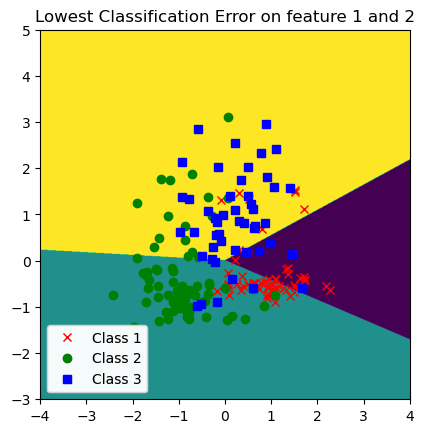

In [130]:
plotDecBoundaries(xdata_standard[:,0:2], ydata, weight_12[3], 'Lowest Classification Error on feature 1 and 2' )

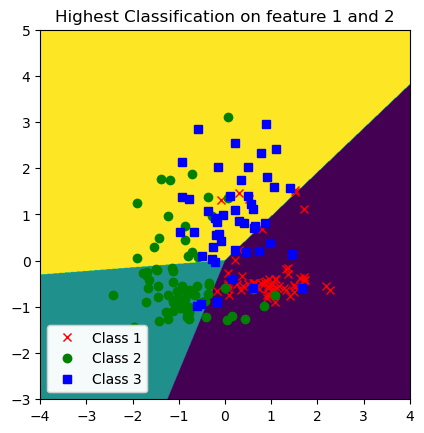

In [131]:
plotDecBoundaries(xdata_standard[:,0:2], ydata, weight_12[4], 'Highest Classification on feature 1 and 2' )

Run a multiclass perceptron classifier on the 2D data using only features x1, x6

In [136]:
weight_16 = MLP_classifier(xdata_standard[:,[0,5]], ydata)
weight_16 = np.array(weight_16)

The mean classification error rate in run 1 = 0.24930555555555559
The mean classification error rate in run 2 = 0.23819444444444446
The mean classification error rate in run 3 = 0.22083333333333335
The mean classification error rate in run 4 = 0.2534722222222222
The mean classification error rate in run 5 = 0.22916666666666666
The average and standard deviation of the mean classification error over the 5 runs is 0.23819444444444446 and 0.012163685581006285


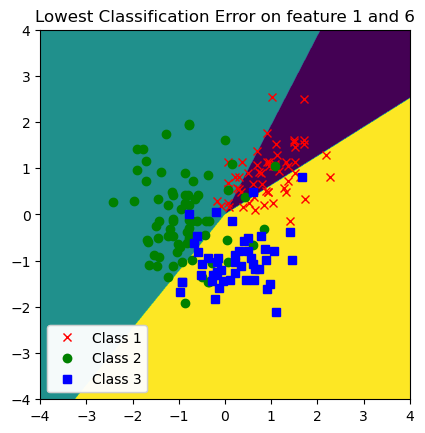

In [139]:
plotDecBoundaries(xdata_standard[:,[0,5]], ydata, weight_16[2], 'Lowest Classification Error on feature 1 and 6' )

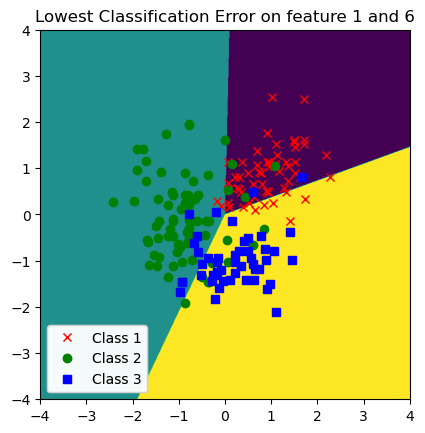

In [140]:
plotDecBoundaries(xdata_standard[:,[0,5]], ydata, weight_16[3], 'Lowest Classification Error on feature 1 and 6' )

# (b) PCA based on unnormalized dataset.

In [70]:
def plot_PCA(xdata_orig, ydata_orig, title):

    xdata_ = np.copy(xdata_orig)
    ydata = np.copy(ydata_orig)
    
    pca = PCA(n_components=2)
#     xdata = pca.fit(xdata).transform(xdata)
    xdata = pca.fit_transform(xdata_)
    
    plt.title(title)
    plt.plot(xdata[ydata == 1, 0],xdata[ydata == 1, 1], 'rx', label = "Class 1")
    plt.plot(xdata[ydata == 2, 0],xdata[ydata == 2, 1], 'go', label = "Class 2")
    plt.plot(xdata[ydata == 3, 0],xdata[ydata == 3, 1], 'bs', label = "Class 3")
    plt.xlabel(f"Feature 1")
    plt.ylabel(f"Feature 2")
    plt.legend()
    plt.show()
    
    return xdata

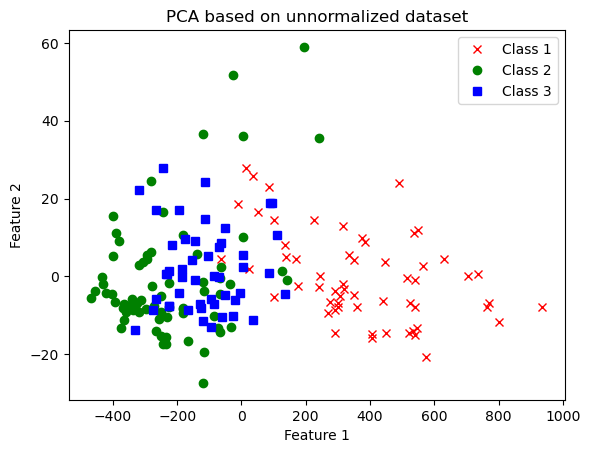

In [71]:
xdata_pca_unnormal = plot_PCA(xdata, ydata, "PCA based on unnormalized dataset")

In [30]:
weights_pca_unnormal = MLP_classifier(xdata_pca_unnormal, ydata)

The mean classification error rate in run 1 = 0.34375000000000006
The mean classification error rate in run 2 = 0.36944444444444446
The mean classification error rate in run 3 = 0.46944444444444444
The mean classification error rate in run 4 = 0.4583333333333333
The mean classification error rate in run 5 = 0.45138888888888895
The average and standard deviation of the mean classification error over the 5 runs is 0.41847222222222225 and 0.051493137502744396


(179, 2811)


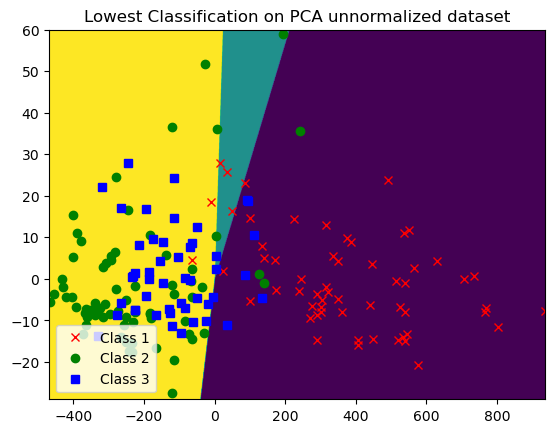

In [60]:
plotDecBoundaries(xdata_pca_unnormal, ydata, weights_pca_unnormal[0], 'Lowest Classification on PCA unnormalized dataset',inc = 0.5 )


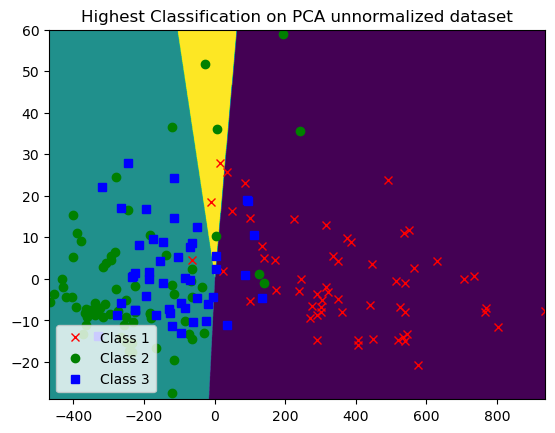

In [62]:
plotDecBoundaries(xdata_pca_unnormal, ydata, weights_pca_unnormal[2], 'Highest Classification on PCA unnormalized dataset',inc = 0.5 )


## (c) PCA based on standardized dataset.

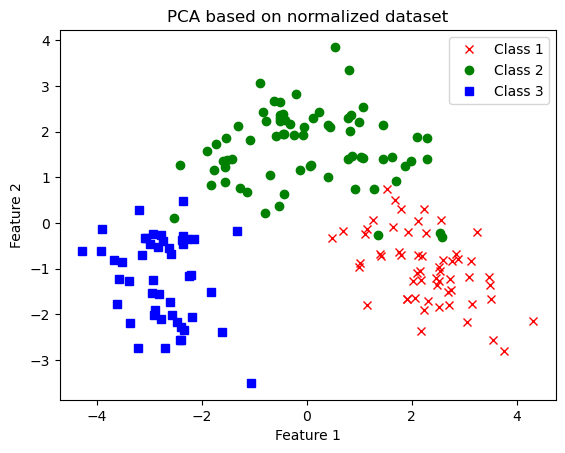

In [72]:
xdata_pca_normal = plot_PCA(xdata_standard, ydata, "PCA based on normalized dataset")

In [73]:
weights_pca_normal = MLP_classifier(xdata_pca_normal, ydata)

The mean classification error rate in run 1 = 0.05208333333333335
The mean classification error rate in run 2 = 0.052083333333333336
The mean classification error rate in run 3 = 0.0388888888888889
The mean classification error rate in run 4 = 0.04444444444444445
The mean classification error rate in run 5 = 0.10277777777777779
The average and standard deviation of the mean classification error over the 5 runs is 0.05805555555555557 and 0.022908668637994484


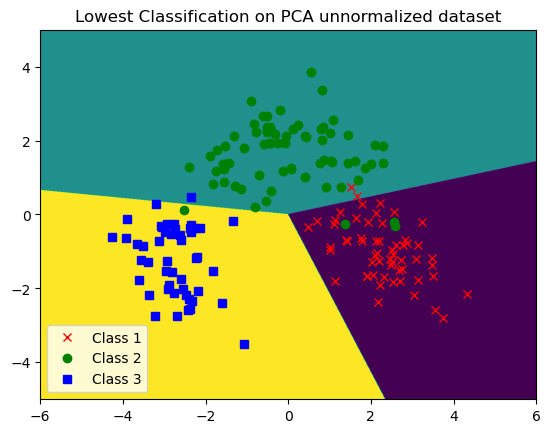

In [77]:
plotDecBoundaries(xdata_pca_normal, ydata, weights_pca_normal[2], 'Lowest Classification on PCA unnormalized dataset',inc = 0.01 )

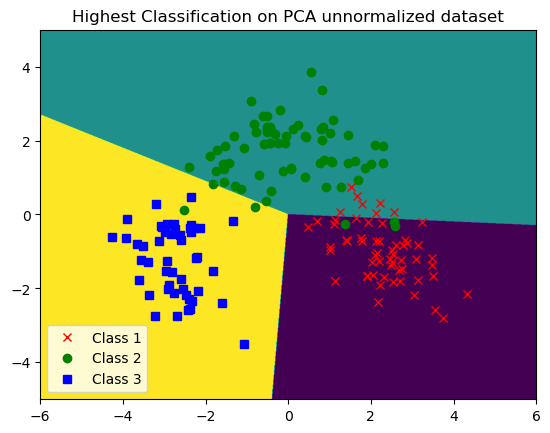

In [92]:
plotDecBoundaries(xdata_pca_normal, ydata, weights_pca_normal[4], 'Highest Classification on PCA unnormalized dataset',inc = 0.01 )

## (d) MDA (using LDA as an approximation to MDA).

In [82]:
def plot_MDA(xdata_orig, ydata_orig, title):

    xdata_ = np.copy(xdata_orig)
    ydata = np.copy(ydata_orig)
    
    lda = LinearDiscriminantAnalysis(n_components=2)
#     xdata = pca.fit(xdata).transform(xdata)
    xdata = lda.fit_transform(xdata_, ydata)
    
    plt.title(title)
    plt.plot(xdata[ydata == 1, 0],xdata[ydata == 1, 1], 'rx', label = "Class 1")
    plt.plot(xdata[ydata == 2, 0],xdata[ydata == 2, 1], 'go', label = "Class 2")
    plt.plot(xdata[ydata == 3, 0],xdata[ydata == 3, 1], 'bs', label = "Class 3")
    plt.xlabel(f"Feature 1")
    plt.ylabel(f"Feature 2")
    plt.legend()
    plt.show()
    
    return xdata

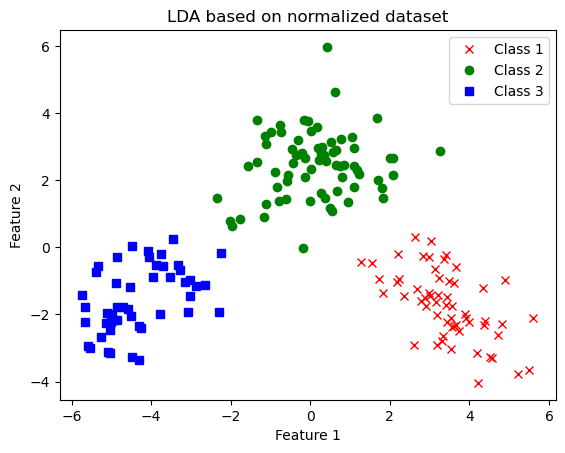

In [87]:
xdata_lda_normal = plot_MDA(xdata_standard, ydata, "LDA based on normalized dataset")

In [88]:
weights_lda_normal = MLP_classifier(xdata_lda_normal, ydata)

The mean classification error rate in run 1 = 0.01666666666666667
The mean classification error rate in run 2 = 0.011111111111111117
The mean classification error rate in run 3 = 0.005555555555555558
The mean classification error rate in run 4 = 0.016666666666666673
The mean classification error rate in run 5 = 0.011111111111111117
The average and standard deviation of the mean classification error over the 5 runs is 0.012222222222222226 and 0.004157397096415491


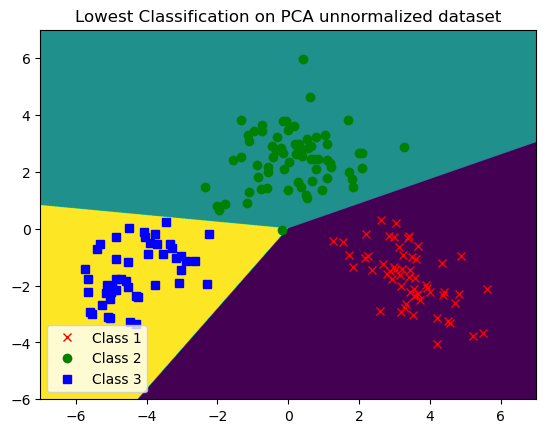

In [89]:
plotDecBoundaries(xdata_lda_normal, ydata, weights_lda_normal[2], 'Lowest Classification on PCA unnormalized dataset',inc = 0.01 )

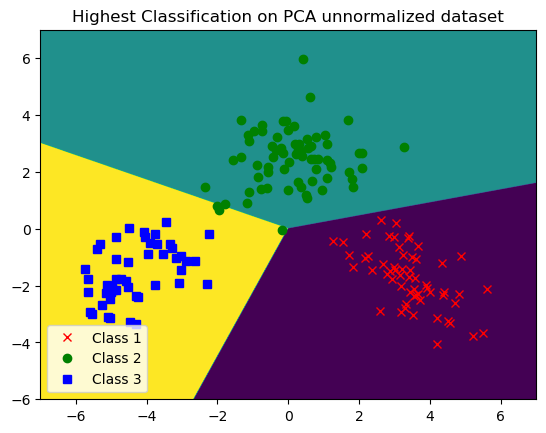

In [91]:
plotDecBoundaries(xdata_lda_normal, ydata, weights_lda_normal[0], 'Highest Classification on PCA unnormalized dataset',inc = 0.01 )